<h1 align=' center'> Function Transformer </h1>

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import scipy.stats as stats

In [49]:
df = pd.read_csv('titanic_train.csv' , usecols=['Age', 'Fare','Survived'])

In [50]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
df['Age'].isnull().sum()

177

In [52]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [53]:
df['Age'].isnull().sum()

0

### Train test split

In [54]:
 from sklearn.model_selection import train_test_split

In [55]:
X = df.drop(columns='Survived')

In [56]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [57]:
y=df['Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Is Data normally distibuted ?

### <font color='red'> Q-Q plot

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


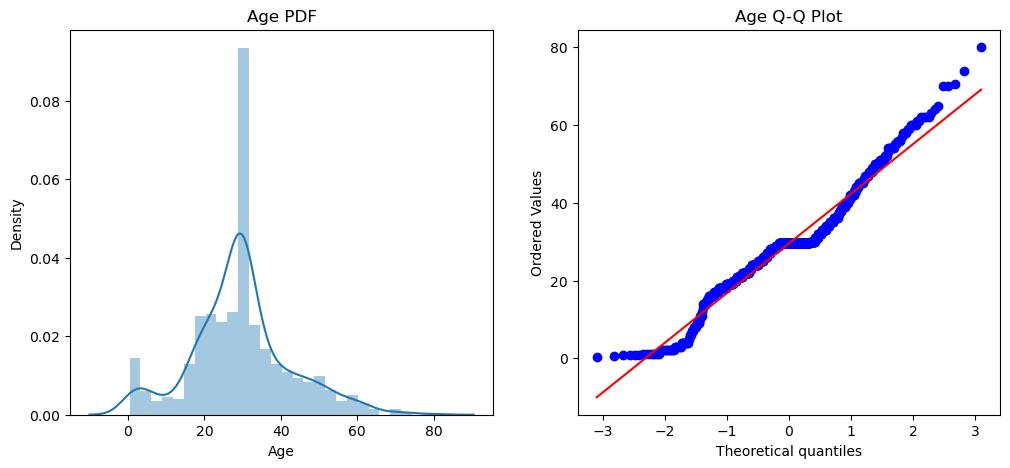

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'],kde=True)
plt.title('Age PDF')
plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Q-Q Plot')
plt.show()

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


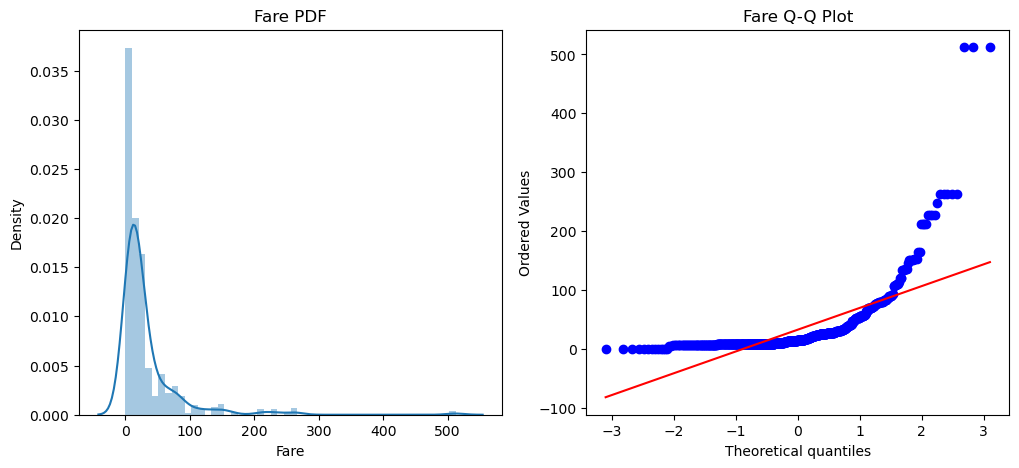

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(X_train['Fare'], kde= True)
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Q-Q Plot')
plt.show()

- Here Age is close to normal Distribution 
- And fare is Right Skewed
- Now lets applt it to model for DT and Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
lr=LogisticRegression() # Logistic regression obj
dt =DecisionTreeClassifier() # DT obj

In [64]:
# Fit the model

lr.fit(X_train, y_train)
dt.fit(X_train,y_train)

y_pred_lr= lr.predict(X_test)
y_pred_dt= dt.predict(X_test)


### Performance Matrics

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print('Accuracy LR: ',accuracy_score(y_test,y_pred_lr))
print('Accuracy DT: ',accuracy_score(y_test,y_pred_dt))

Accuracy LR:  0.6480446927374302
Accuracy DT:  0.6871508379888268


### Log Transform


- Now let's apply Log Transform and then train the model

In [67]:
from sklearn.preprocessing import FunctionTransformer

- Here we give func = parameter logic of what transform we want to apply
- here we use np.log1p because log 0 will be math error, so logip gives 1 value to x so that it not become zero

In [68]:
trf =FunctionTransformer(func=np.log1p)

In [69]:
## Transform Train data
X_train_transformed= trf.fit_transform(X_train)

## Transform Test data
X_test_transformed = trf.transform(X_test)

#### Train th model

In [70]:
lr = LogisticRegression()
dt =DecisionTreeClassifier()

In [71]:
lr.fit(X_train_transformed,y_train)
dt.fit(X_train_transformed,y_train)

y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)

### Performance Metrics

print('Accuracy LR: ',accuracy_score(y_test,y_pred_lr))
print('Accuracy DT: ',accuracy_score(y_test,y_pred_dt))

Accuracy LR:  0.6815642458100558
Accuracy DT:  0.6983240223463687


### Check if Model is Overfitted to data

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
X_transformed = trf.fit_transform(X)

lr = LogisticRegression()
dt = DecisionTreeClassifier()

print('LR ', np.mean(cross_val_score(lr,X_transformed, y, scoring='accuracy', cv=10)))
print('DT ', np.mean(cross_val_score(dt,X_transformed, y, scoring='accuracy', cv=10)))

LR  0.678027465667915
DT  0.6577652933832709


### Q-Q plot of Train model

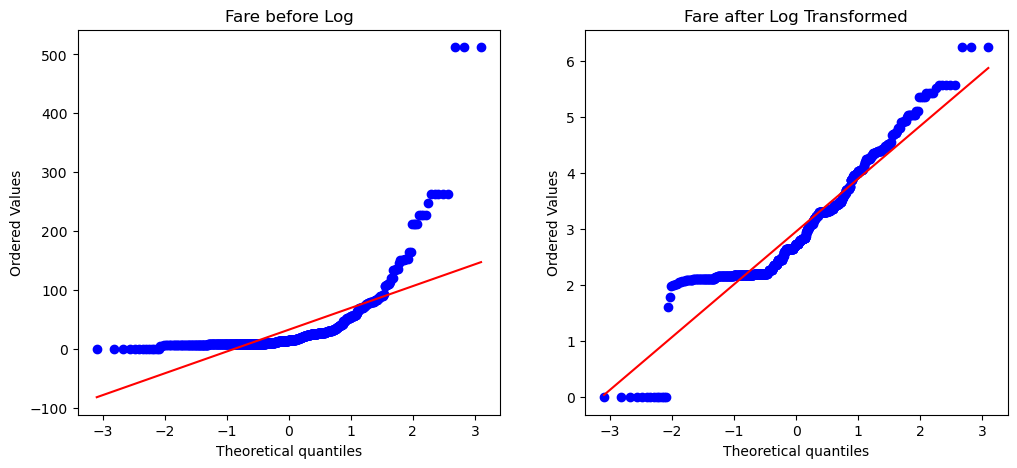

In [74]:
## for Fare

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before Log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Fare'],plot=plt)
plt.title('Fare after Log Transformed')
plt.show()

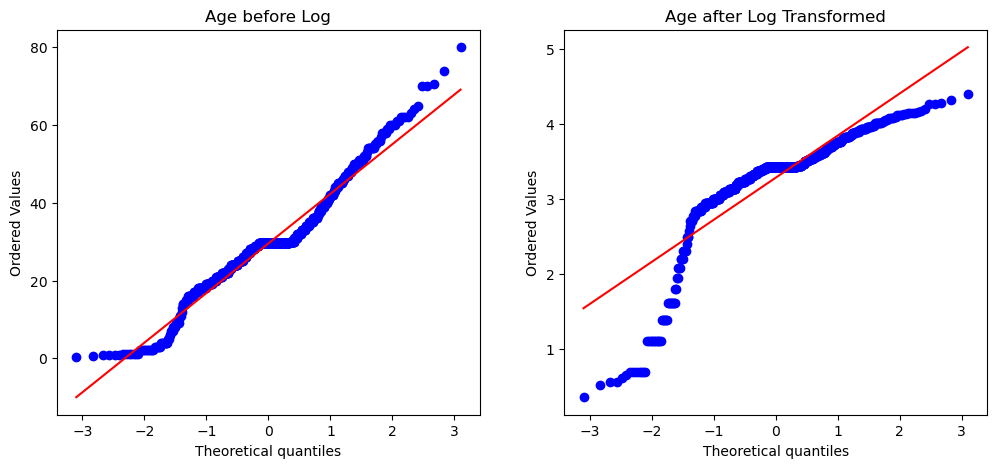

In [75]:
## for Fare

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before Log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Age'],plot=plt)
plt.title('Age after Log Transformed')
plt.show()

- Here we apply log Transform to both Fare and age column to make it normally distibuted 
- But Age was already colse to normal Distibution, so after transform its distibution has been changed
- Now let's Apply Log Transform only to __Fare__ column

### Log Transform : Fare

- Apply Column Transformation on Fare by changing it Distribution(log Transformation)

In [76]:
from sklearn.compose import ColumnTransformer

In [77]:
trf2 = ColumnTransformer([('log',FunctionTransformer(func=np.log1p), ['Fare'])], remainder='passthrough')

In [78]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

### Train the model: on Log transformed Fare

In [79]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [80]:
lr.fit(X_train_transformed2, y_train)
dt.fit(X_train_transformed2,y_train)

# Predict
y_pred_lr2 = lr.predict(X_test_transformed2)
y_pred_dt2 = dt.predict(X_test_transformed2)

# Performance Metrics
print('Accuracy LR', accuracy_score(y_test, y_pred_lr2))
print('Accuracy DT', accuracy_score(y_test, y_pred_dt2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


### Cross Validation 

In [81]:
X_transformed = trf2.fit_transform(X)

lr = LogisticRegression()
dt = DecisionTreeClassifier()

print('LR ', np.mean(cross_val_score(lr,X_transformed, y, scoring='accuracy', cv=10)))
print('DT ', np.mean(cross_val_score(dt,X_transformed, y, scoring='accuracy', cv=10)))

LR  0.6712609238451936
DT  0.6577403245942571


In [87]:
def apply_transform(transform):
    X= df.iloc[:,1:3]
    y= df.iloc[:,0]
    
    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare'])
    ], remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    # Train the model 
    clf = LogisticRegression()
    
    # Cross Validation
    print('Accuracy', np.mean(cross_val_score(clf,X_trans, y, scoring='accuracy', cv= 10)))
    
    ## Q-Q Plot
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist = 'norm', plot =plt)
    plt.title('Fare before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fate after Transform')
    plt.show()
    

###  Give data As is is

Accuracy 0.6589013732833957


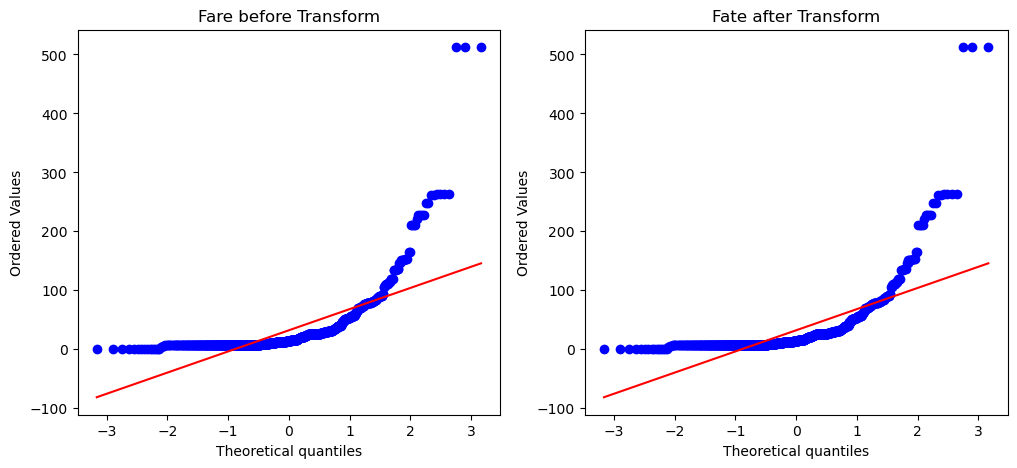

In [88]:
apply_transform(lambda X: X)

- No Change 

### Square Transformed

Accuracy 0.6442446941323345


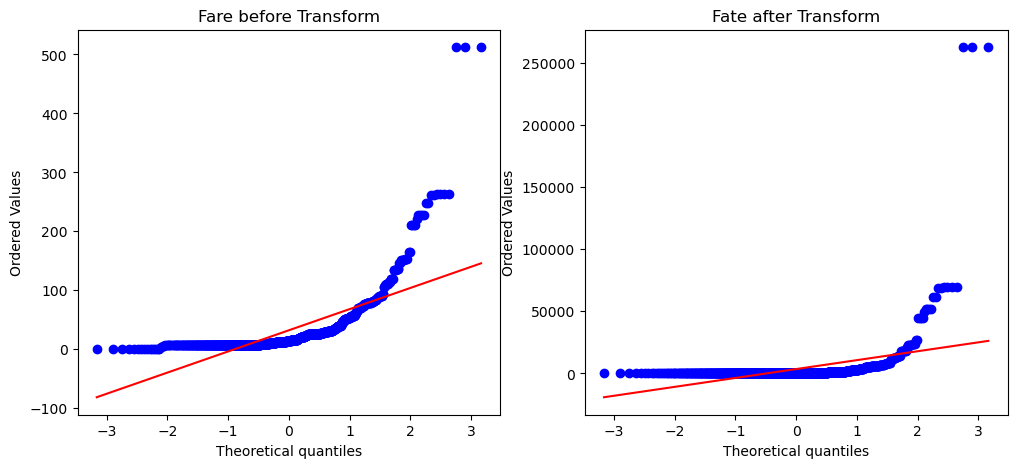

In [89]:
apply_transform(lambda X:X**2)

- Peformance detorated as Square transform is more useful for left skewed data

#### Cube Transformed

Accuracy 0.39843945068664166


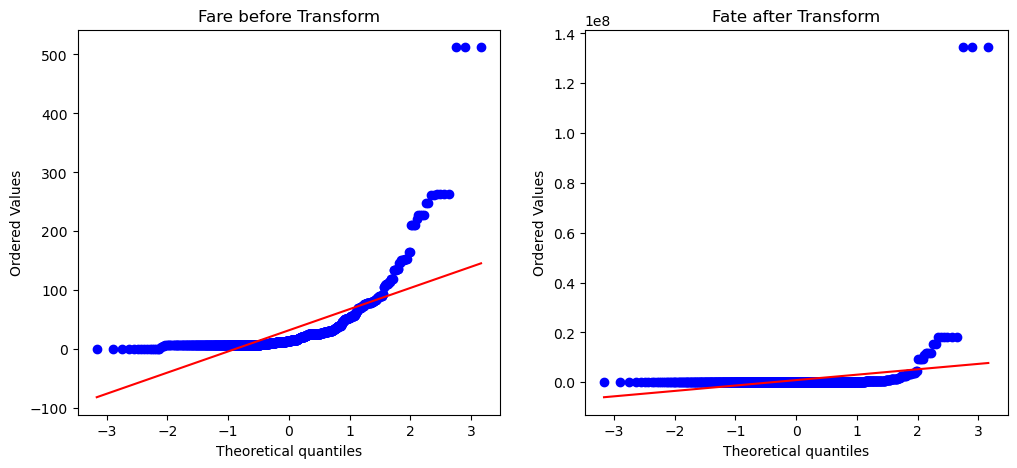

In [90]:
apply_transform(lambda X: X**3)

- Worst than Square (obiously)

###  Suare root Transformed 

Accuracy 0.6589013732833957


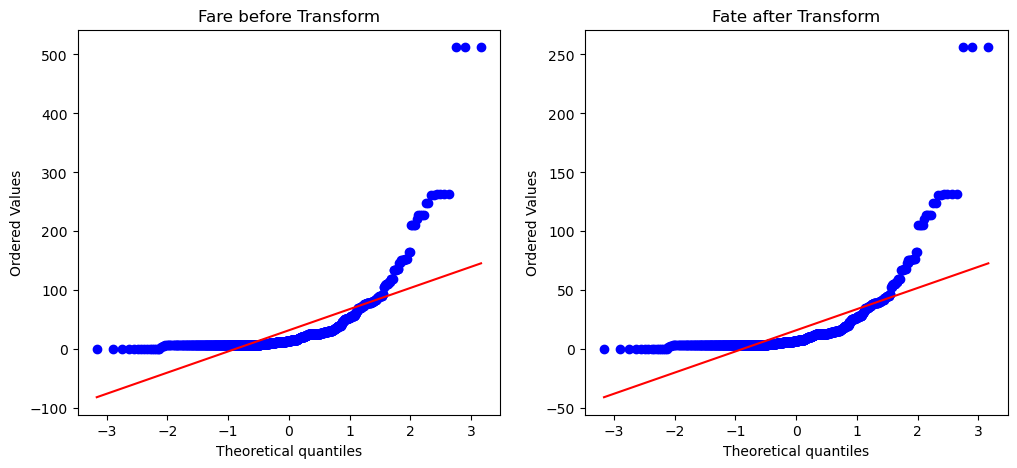

In [91]:
apply_transform(lambda X:X*0.5)

 - No diffrence with and without transformed

### Reciprocal transformed

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Amruta\anaco

Accuracy nan


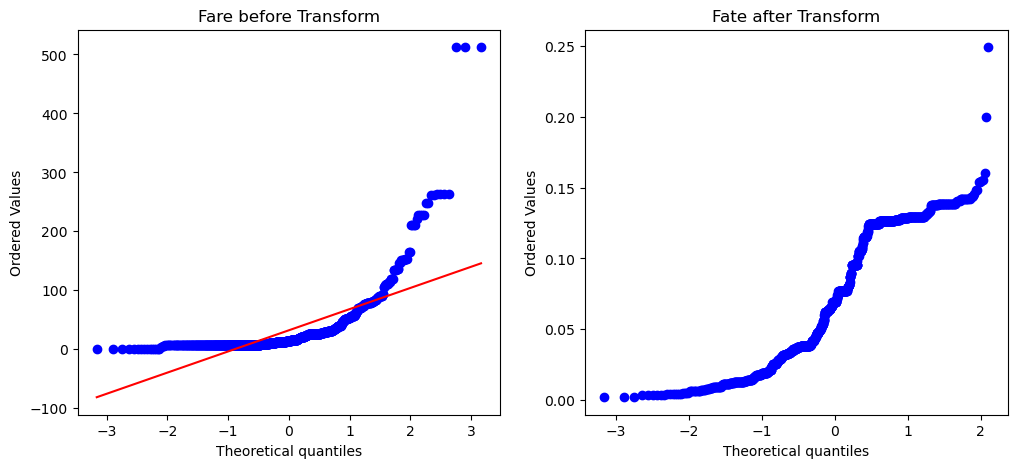

In [92]:
apply_transform(lambda X: 1/X)

 - May be there is data wich is zero as accuracy is nan
 - So lets 

Accuracy 0.61729088639201


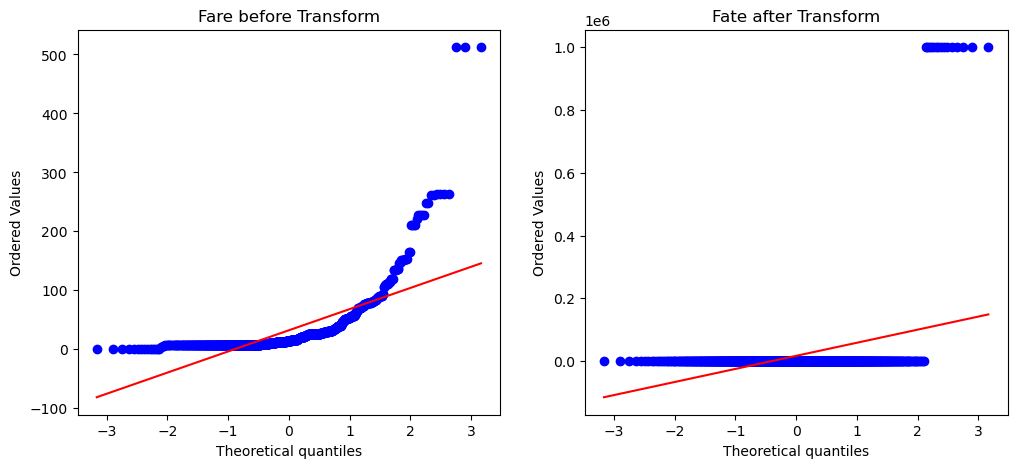

In [97]:
apply_transform(lambda X:1/(X+0.000001))

- Not Good 

Accuracy 0.6195131086142323


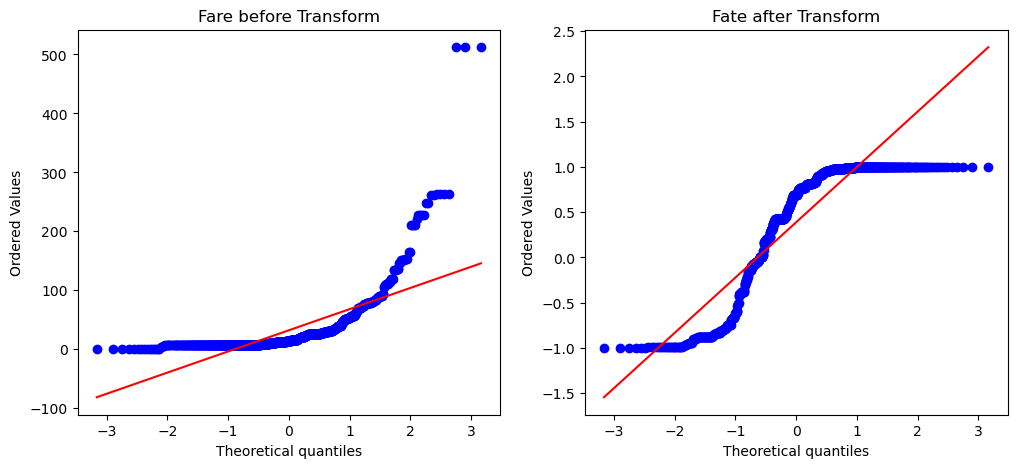

In [100]:
apply_transform(np.sin)